# Week 4 White House Logs
### Allison Biediger
### DSC 540 T303

***

### Importing Data

In [209]:
import pandas as pd
df1 = pd.read_csv("2023.01_WAVES-ACCESS-RECORDS.csv")
df2 = pd.read_csv("2022.01_WAVES-ACCESS-RECORDS.csv")
df3 = pd.read_csv("2022.02_WAVES-ACCESS-RECORDS.csv")
df4 = pd.read_csv("2022.03_WAVES-ACCESS-RECORDS-.csv")
df5 = pd.read_csv("2022.04_WAVES-ACCESS-RECORDS.csv")
df6 = pd.read_csv("2022.05-WAVES-ACCESS-RECORDS.csv")
df7 = pd.read_csv("2022.06_WAVES-ACCESS-RECORDS.csv")
df8 = pd.read_csv("2022.07_WAVES-ACCESS-RECORDS.csv")
df9 = pd.read_csv("2022.08_WAVES-ACCESS-RECORDS.csv")
df10 = pd.read_csv("2022.09_WAVES-ACCESS-RECORDS.csv")
df11 = pd.read_csv("2022.10_WAVES-ACCESS-RECORDS.csv")
df12 = pd.read_csv("2022.11_WAVES-ACCESS-RECORDS.csv")
df13 = pd.read_csv("2022.12_WAVES-ACCESS-RECORDS.csv")
df14 = pd.read_csv("2023.01_WAVES-ACCESS-RECORDS.csv")
df15 = pd.read_csv("2023.02_WAVES-ACCESS-RECORDS.csv")
df16 = pd.read_csv("2023.03_WAVES-ACCESS-RECORDS.csv")
df17 = pd.read_csv("2023.04_WAVES-ACCESS-RECORDS.csv")
df18 = pd.read_csv("2023.05_WAVES-ACCESS-RECORDS.csv")
df19 = pd.read_csv("2023.06_WAVES-ACCESS-RECORDS.csv")
df20 = pd.read_csv("2023.07_WAVES-ACCESS-RECORDS.csv")
df21 = pd.read_csv("2023.08_WAVES-ACCESS-RECORDS.csv")
df22 = pd.read_csv("2023.09_WAVES-ACCESS-RECORDS.csv")
df23 = pd.read_csv("2023.10_WAVES-ACCESS-RECORDS.csv")
df24 = pd.read_csv("2023.11_WAVES-ACCESS-RECORDS.csv")
df25 = pd.read_csv("2023.12_WAVES-ACCESS-RECORDS.csv")

C:\Users\flyer\AppData\Local\Temp\ipykernel_25704\4291694791.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("2023.01_WAVES-ACCESS-RECORDS.csv")
C:\Users\flyer\AppData\Local\Temp\ipykernel_25704\4291694791.py:11: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df10 = pd.read_csv("2022.09_WAVES-ACCESS-RECORDS.csv")
C:\Users\flyer\AppData\Local\Temp\ipykernel_25704\4291694791.py:12: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df11 = pd.read_csv("2022.10_WAVES-ACCESS-RECORDS.csv")
C:\Users\flyer\AppData\Local\Temp\ipykernel_25704\4291694791.py:14: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df13 = pd.read_csv("2022.12_WAVES-ACCESS-RECORDS.csv")
C:\Users\flyer\AppData\Local\Temp\ipykernel_25704\4291694791.py:15: DtypeWarning: Columns (7,8)

### Checking column names

In [211]:
df1.columns

Index(['Last Name', 'First Name', 'Middle Initial', 'UIN', 'BDGNBR',
       'Access Type', 'TOA', 'POA', 'TOD', 'POD', 'Appointment Made Date',
       'Appointment Start Date', 'Appointment End Date',
       'Appointment Cancel Date', 'Total People', 'Last Updated By', 'POST',
       'Last Entry Date', 'Terminal Suffix', 'Visitee Last Name',
       'Visitee First Name', 'Meeting Location', 'Meeting Room',
       'Caller Last Name', 'Caller First Name', 'CALLER_ROOM', 'RELEASEDATE'],
      dtype='object')

In [212]:
# Get the columns of df1
df1_columns = df1.columns

# Standardize all dataframes
dataframes = [df2, df3, df4, df5, df6, df7, df8, df9, df10, 
              df11, df12, df13, df14, df15, df16, df17, df18, 
              df19, df20, df21, df22, df23, df24, df25]

# Iterate over all dataframes to align columns with df1
standardized_dataframes = []
for i, df in enumerate(dataframes):
    # Rename columns to match df1
    df = df.rename(columns={col: col for col in df.columns if col in df1_columns})
    
    # Add missing columns as NaN
    for col in df1_columns:
        if col not in df.columns:
            df[col] = pd.NA

    # Drop extra columns not in df1
    df = df[df1_columns]
    
    # Append to the standardized list
    standardized_dataframes.append(df)

# Include df1 in the final list for merging
standardized_dataframes.insert(0, df1)

# Merge all dataframes into one
merged_df = pd.concat(standardized_dataframes, ignore_index=True)

# Display the merged dataframe's shape and columns
print("Merged DataFrame shape:", merged_df.shape)
print("Columns in the merged DataFrame:")
print(merged_df.columns)

C:\Users\flyer\AppData\Local\Temp\ipykernel_25704\1979373858.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_df = pd.concat(standardized_dataframes, ignore_index=True)


Merged DataFrame shape: (1200780, 27)
Columns in the merged DataFrame:
Index(['Last Name', 'First Name', 'Middle Initial', 'UIN', 'BDGNBR',
       'Access Type', 'TOA', 'POA', 'TOD', 'POD', 'Appointment Made Date',
       'Appointment Start Date', 'Appointment End Date',
       'Appointment Cancel Date', 'Total People', 'Last Updated By', 'POST',
       'Last Entry Date', 'Terminal Suffix', 'Visitee Last Name',
       'Visitee First Name', 'Meeting Location', 'Meeting Room',
       'Caller Last Name', 'Caller First Name', 'CALLER_ROOM', 'RELEASEDATE'],
      dtype='object')


### Exploring the data to find insights

In [214]:
# Combine Caller Last Name and Caller First Name into a single column for analysis
merged_df['Caller Full Name'] = merged_df['Caller First Name'] + ' ' + merged_df['Caller Last Name']

# Count the number of meetings called by each person
caller_meeting_counts = merged_df['Caller Full Name'].value_counts()

# Top 10 who have called the most meetings
top_10_callers = caller_meeting_counts.head(10)
print("Top 10 Callers (Most Meetings):")
print(top_10_callers)

# Top 10 who have called the least meetings (excluding NaN or blank entries)
least_10_callers = caller_meeting_counts[caller_meeting_counts > 0].tail(10)
print("\nTop 10 Callers (Least Meetings):")
print(least_10_callers)


Top 10 Callers (Most Meetings):
Caller Full Name
VISITORSOFFICE WAVES    658197
TOUR WW                  68161
JANICE LEE               42610
GIONELLY MILLS           32542
PEYTON SCHWARTZ          30076
HALEY JONES              26195
EDWARD TELEKY            18358
BOWLING ALLEY            12739
AMANDA TROCOLA           11324
LYDIA HECMANCZUK          9102
Name: count, dtype: int64

Top 10 Callers (Least Meetings):
Caller Full Name
SARAH SPOONER         1
RICARDO RODRIGUEZ     1
BETTY LIANG           1
PETER SCARPETTA       1
BLAKE ARMSTRONG       1
ANN HUGHES            1
HEATHER ASHWORTH      1
YOLANDA ENTZMINGER    1
GIP HOLLOWAY          1
ROBERT DOWNING        1
Name: count, dtype: int64


***
## Begining Bowling Alley Focus

In [216]:
# Filter for records where 'Caller Full Name' contains "BOWLING ALLEY"
bowling_alley_df = merged_df[merged_df['Caller Full Name'].str.contains("BOWLING ALLEY", na=False, case=False)]

# Convert 'Appointment Start Date' to datetime for seasonal analysis
bowling_alley_df['Appointment Start Date'] = pd.to_datetime(bowling_alley_df['Appointment Start Date'], errors='coerce')

# Extract the month from the date
bowling_alley_df['Month'] = bowling_alley_df['Appointment Start Date'].dt.month

C:\Users\flyer\AppData\Local\Temp\ipykernel_25704\2833482516.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowling_alley_df['Appointment Start Date'] = pd.to_datetime(bowling_alley_df['Appointment Start Date'], errors='coerce')
C:\Users\flyer\AppData\Local\Temp\ipykernel_25704\2833482516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowling_alley_df['Month'] = bowling_alley_df['Appointment Start Date'].dt.month


C:\Users\flyer\AppData\Local\Temp\ipykernel_25704\3047734666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowling_alley_df['Year-Month'] = bowling_alley_df['Appointment Start Date'].dt.strftime('%b %Y')


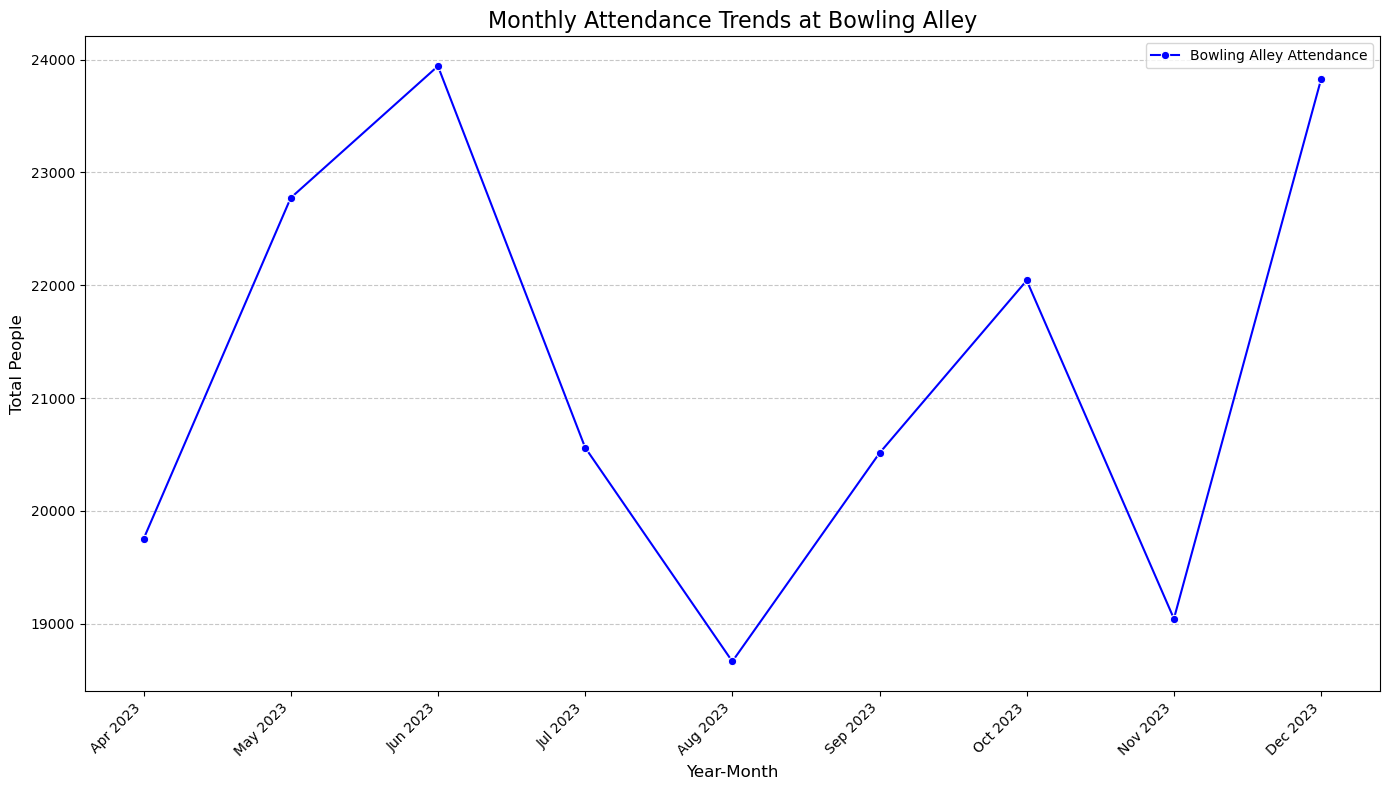

In [217]:
# Create a formatted 'Year-Month' column for continuous time
bowling_alley_df['Year-Month'] = bowling_alley_df['Appointment Start Date'].dt.strftime('%b %Y')

# Group by 'Year-Month' and sum 'Total People'
continuous_trend = bowling_alley_df.groupby('Year-Month')['Total People'].sum().reset_index()

# Ensure the data is sorted in chronological order
continuous_trend['Appointment Start Date'] = pd.to_datetime(continuous_trend['Year-Month'], format='%b %Y')
continuous_trend = continuous_trend.sort_values('Appointment Start Date')

# Plot the trend
plt.figure(figsize=(14, 8))
sns.lineplot(data=continuous_trend, x='Year-Month', y='Total People', marker='o', color='blue', label='Bowling Alley Attendance')
plt.title("Monthly Attendance Trends at Bowling Alley", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Total People", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Lowest Monthly attendence in August, November and April
***

C:\Users\flyer\AppData\Local\Temp\ipykernel_25704\1834649907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowling_alley_df['Appointment Start Date'] = pd.to_datetime(bowling_alley_df['Appointment Start Date'])
C:\Users\flyer\AppData\Local\Temp\ipykernel_25704\1834649907.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowling_alley_df['Day_of_Week'] = bowling_alley_df['Appointment Start Date'].dt.dayofweek


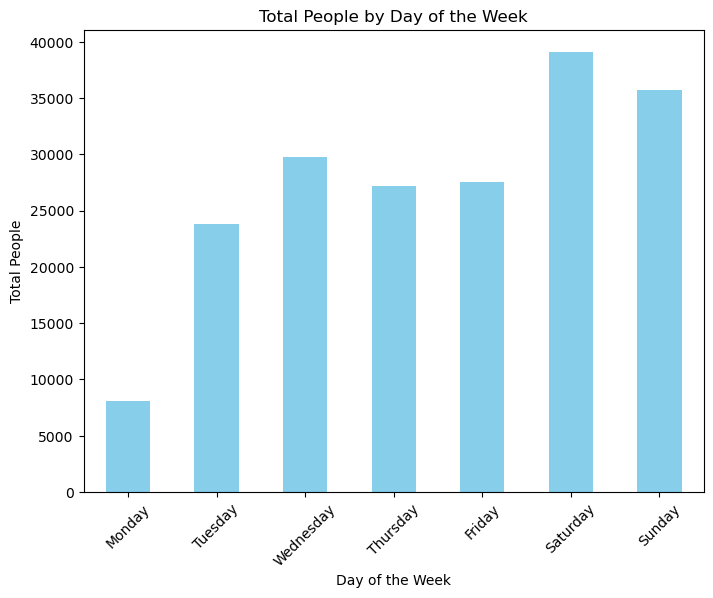

The busiest day of the week is: Saturday


In [218]:
bowling_alley_df['Appointment Start Date'] = pd.to_datetime(bowling_alley_df['Appointment Start Date'])

# Extract the day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
bowling_alley_df['Day_of_Week'] = bowling_alley_df['Appointment Start Date'].dt.dayofweek

# Aggregate data by day of the week and sum the number of people
day_of_week_data = bowling_alley_df.groupby('Day_of_Week')['Total People'].sum()

# Map day numbers to actual day names for better readability
day_of_week_data.index = day_of_week_data.index.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
                                                     3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

# Plot the results
plt.figure(figsize=(8,6))
day_of_week_data.plot(kind='bar', color='skyblue')
plt.title('Total People by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total People')
plt.xticks(rotation=45)
plt.show()

# Print the busiest day of the week
busiest_day = day_of_week_data.idxmax()
print(f"The busiest day of the week is: {busiest_day}")


### Least busy day is Monday followed by Tuesday
***

C:\Users\flyer\AppData\Local\Temp\ipykernel_25704\2256567678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowling_alley_df['Hour_of_Day'] = bowling_alley_df['Appointment Start Date'].dt.hour


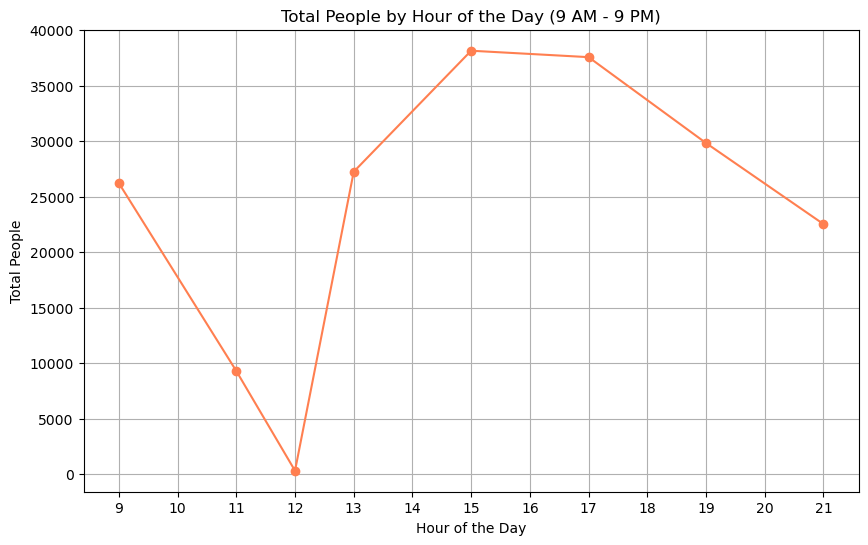

The busiest time of the day is: 15:00


In [219]:
# Extract the hour of the day from the Appointment Start Date
bowling_alley_df['Hour_of_Day'] = bowling_alley_df['Appointment Start Date'].dt.hour

# Filter the data to include only hours between 9 and 21 (9:00 AM to 9:00 PM)
filtered_hour_data = bowling_alley_df[(bowling_alley_df['Hour_of_Day'] >= 9) & 
                                      (bowling_alley_df['Hour_of_Day'] <= 21)]

# Aggregate data by hour and sum the number of people
hour_of_day_data = filtered_hour_data.groupby('Hour_of_Day')['Total People'].sum()

# Plot the results
plt.figure(figsize=(10,6))
hour_of_day_data.plot(kind='line', marker='o', color='coral')
plt.title('Total People by Hour of the Day (9 AM - 9 PM)')
plt.xlabel('Hour of the Day')
plt.ylabel('Total People')
plt.xticks(range(9, 22))  # Show only hours from 9 to 21
plt.grid(True)
plt.show()

# Print the busiest hour
busiest_hour = hour_of_day_data.idxmax()
print(f"The busiest time of the day is: {busiest_hour}:00")

### There is an outlier near 12 pm, and the lowest crowd level will typically be with reservations starting at 11 am followed by 9 pm and 9 am.
***

C:\Users\flyer\AppData\Local\Temp\ipykernel_25704\2614934655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowling_alley_df['Appointment Start Date'] = pd.to_datetime(bowling_alley_df['Appointment Start Date'], format='%b %d %Y %I:%M%p')
C:\Users\flyer\AppData\Local\Temp\ipykernel_25704\2614934655.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowling_alley_df['Arrival Hour'] = bowling_alley_df['Appointment Start Date'].dt.hour


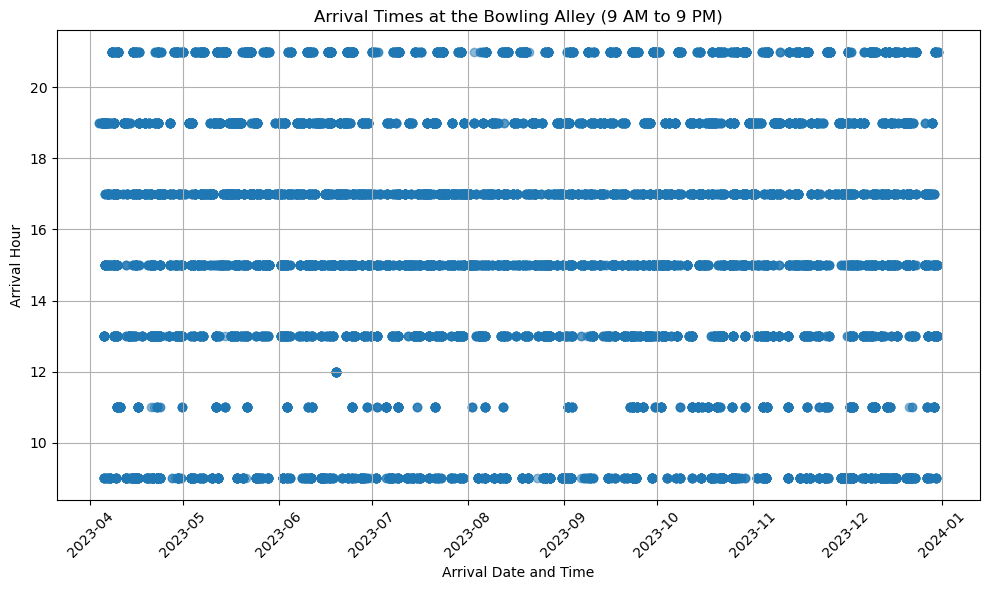

In [220]:
# Convert the 'Appointment Start Date' to datetime
bowling_alley_df['Appointment Start Date'] = pd.to_datetime(bowling_alley_df['Appointment Start Date'], format='%b %d %Y %I:%M%p')

# Filter out times that are outside the open hours (9 AM to 9 PM)
bowling_alley_df['Arrival Hour'] = bowling_alley_df['Appointment Start Date'].dt.hour

# Filter for arrival hours between 9 AM (9) and 9 PM (21)
filtered_data = bowling_alley_df[(bowling_alley_df['Arrival Hour'] >= 9) & (bowling_alley_df['Arrival Hour'] <= 21)]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Appointment Start Date'], filtered_data['Arrival Hour'], alpha=0.5)
plt.title('Arrival Times at the Bowling Alley (9 AM to 9 PM)')
plt.xlabel('Arrival Date and Time')
plt.ylabel('Arrival Hour')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

### Gives good visual for potential reservation openenings, seen that the 11 am time frame is the best for this. The anamolie metioned above is also seen here it is only one data point.
***


C:\Users\flyer\AppData\Local\Temp\ipykernel_25704\3049827168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowling_alley_df['Appointment Start Date'] = pd.to_datetime(bowling_alley_df['Appointment Start Date'], format='%b %d %Y %I:%M%p')
C:\Users\flyer\AppData\Local\Temp\ipykernel_25704\3049827168.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowling_alley_df['Arrival Time'] = bowling_alley_df['Appointment Start Date'].dt.strftime('%H:%M')
C:\Users\flyer\AppData\Local\Temp\ipykernel_25704\304982

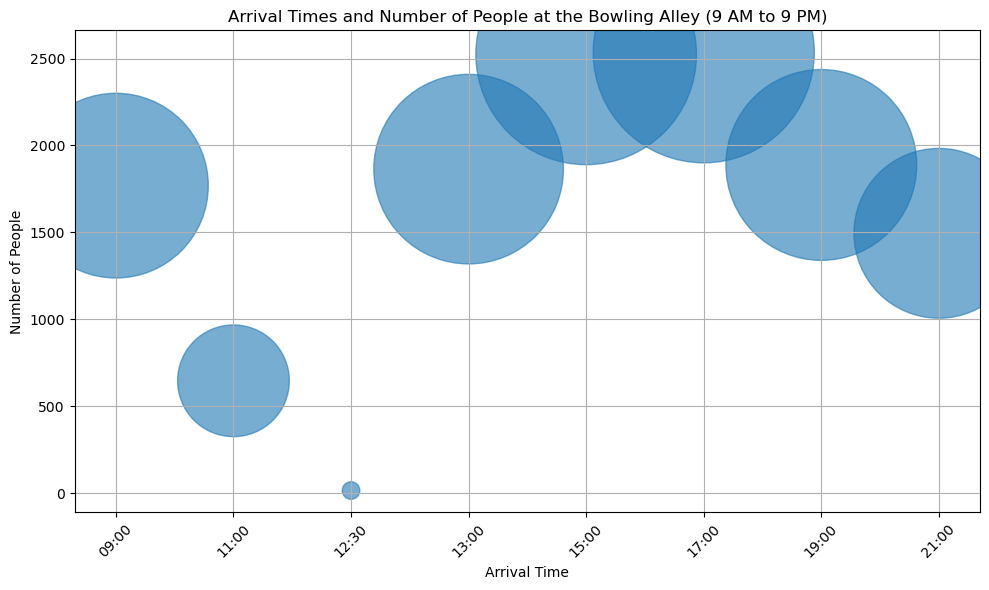

In [221]:
# Convert the 'Appointment Start Date' to datetime
bowling_alley_df['Appointment Start Date'] = pd.to_datetime(bowling_alley_df['Appointment Start Date'], format='%b %d %Y %I:%M%p')

#  Extract the time from 'Appointment Start Date' (ignore the date part)
bowling_alley_df['Arrival Time'] = bowling_alley_df['Appointment Start Date'].dt.strftime('%H:%M')

# Filter out times that are outside the open hours (9 AM to 9 PM)
bowling_alley_df['Arrival Hour'] = bowling_alley_df['Appointment Start Date'].dt.hour

# Filter for arrival hours between 9 AM (9) and 9 PM (21)
filtered_data = bowling_alley_df[(bowling_alley_df['Arrival Hour'] >= 9) & (bowling_alley_df['Arrival Hour'] <= 21)]

# Group by the 'Arrival Time' and count the number of people
arrival_counts = filtered_data.groupby('Arrival Time').size()

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Use the 'Arrival Time' as the x-axis and the number of people as the y-axis
plt.scatter(arrival_counts.index, arrival_counts.values, s=arrival_counts.values*10, alpha=0.6)

plt.title('Arrival Times and Number of People at the Bowling Alley (9 AM to 9 PM)')
plt.xlabel('Arrival Time')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

### This visualization helps with the understanding of potential crowd size compared with one time or another.
***

In [237]:
# Convert the 'Appointment Start Date' to datetime
bowling_alley_df['Appointment Start Date'] = pd.to_datetime(bowling_alley_df['Appointment Start Date'], format='%b %d %Y %I:%M%p')

# Extract the day of the week and arrival time
bowling_alley_df['Arrival Time'] = bowling_alley_df['Appointment Start Date'].dt.strftime('%H:%M') 
bowling_alley_df['Day of Week'] = bowling_alley_df['Appointment Start Date'].dt.day_name()  

# Filter out times that are outside the open hours (9 AM to 9 PM)
bowling_alley_df['Arrival Hour'] = bowling_alley_df['Appointment Start Date'].dt.hour
filtered_data = bowling_alley_df[(bowling_alley_df['Arrival Hour'] >= 9) & (bowling_alley_df['Arrival Hour'] <= 21)]

C:\Users\flyer\AppData\Local\Temp\ipykernel_25704\3935113806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowling_alley_df['Appointment Start Date'] = pd.to_datetime(bowling_alley_df['Appointment Start Date'], format='%b %d %Y %I:%M%p')
C:\Users\flyer\AppData\Local\Temp\ipykernel_25704\3935113806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowling_alley_df['Arrival Time'] = bowling_alley_df['Appointment Start Date'].dt.strftime('%H:%M')  # Get time only (hour:minute)
C:\Users\flyer\AppData\Lo

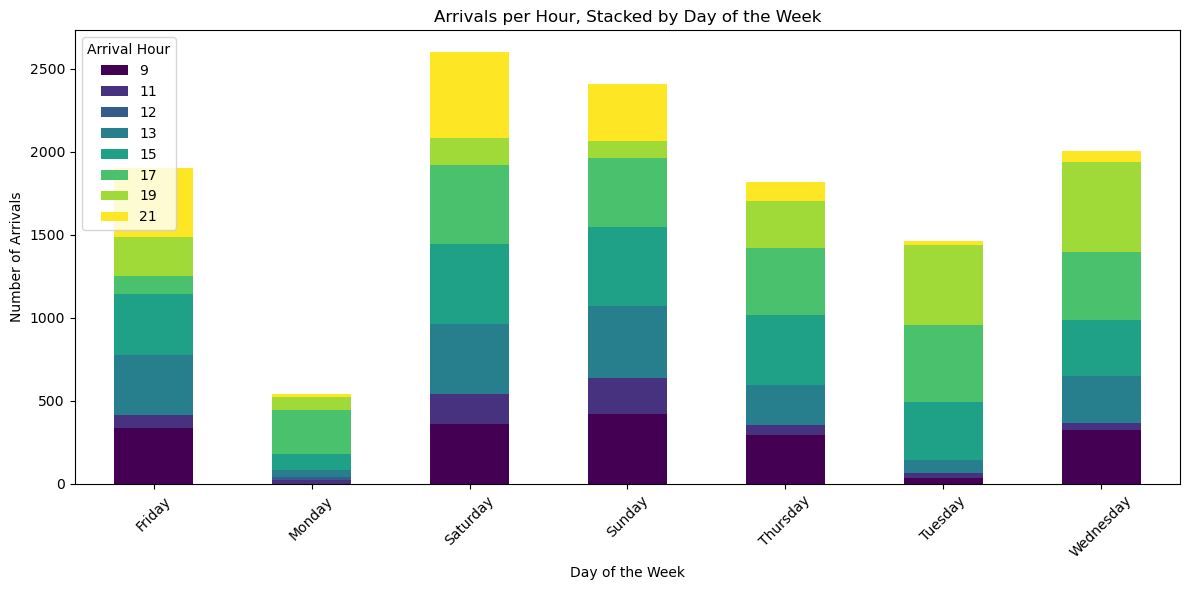

In [239]:
arrival_counts_day = filtered_data['Day of Week'].value_counts().sort_index()

# Count arrivals by hour for each day of the week
arrival_counts_hour = filtered_data.groupby(['Day of Week', 'Arrival Hour']).size().unstack(fill_value=0)

# Stacked bar chart for arrivals by hour across different days
arrival_counts_hour.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Arrivals per Hour, Stacked by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Arrivals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Stacked plot showcases each days specific layout of busy to not busy times. Monday at 11 visually looks to be the least busy of all.
***

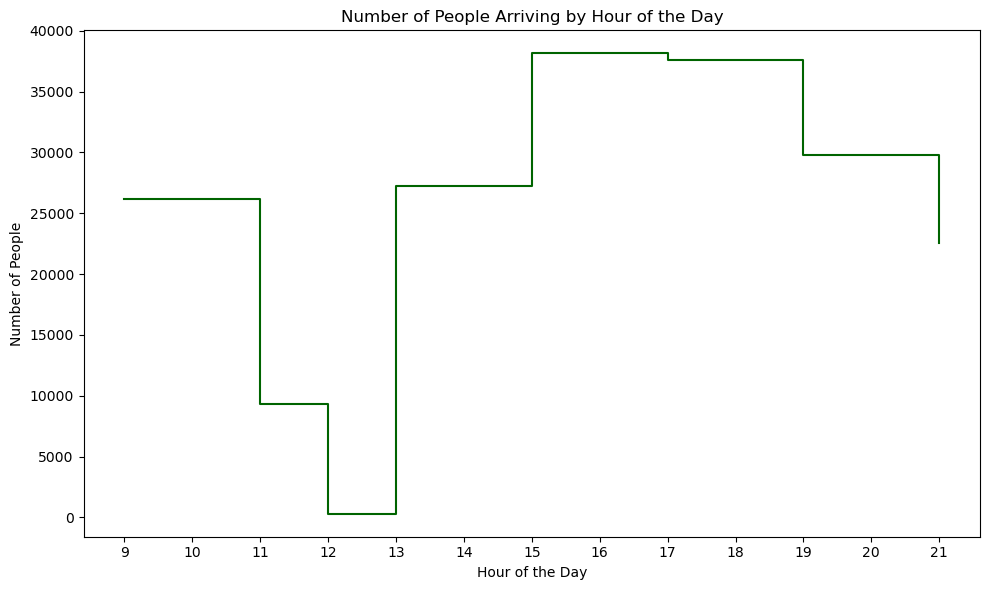

In [168]:
# Group data by hour and sum the total number of people
hourly_people = bowling_alley_df.groupby('Hour')['Total People'].sum()

# Step chart for number of people arriving
plt.figure(figsize=(10, 6))
plt.step(hourly_people.index, hourly_people.values, where='post', color='darkgreen')
plt.title('Number of People Arriving by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of People')
plt.xticks(range(9, 22))
plt.tight_layout()
plt.show()

### Shows hour of the day and the crowd level in a new and more clear way. The highest crowd levels happen at 15 pm and these elevated rates stay inplace until 9 pm.
***